<a href="https://colab.research.google.com/github/sulaimanbehzad/Classifying-Images/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifiers
The purpose of this project is to train two classifiers:
1. Captions classifier
2. Image classifier

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

import imageio
import cv2

https://medium.com/de-bijenkorf-techblog/image-vector-representations-an-overview-of-ways-to-search-visually-similar-images-3f5729e72d07

## Part 2: Image Classifier

Reading the images and format them into a dataframe

In [2]:
# function for reading images into a pandas dataframe
def read_data_into_df(filespath):
  levels = 0
  default_size = 256
  for roots, dirnames, filenames in os.walk(filespath):
    if levels == 0:
      df = pd.DataFrame(columns=dirnames)
    im_list = []
    for fn in filenames:
      im_full_path = os.path.join(roots, fn)
      print(im_full_path)
      # temp=pd.read_csv(txtfile_full_path,sep="\\n", header=None, error_bad_lines=False)
      # print('shape of temp: ', temp.shape)
      # txt_list.append(temp.values)
      # -------------------- another approach to read txt files
      im = cv2.imread(im_full_path)
      im_resized = cv2.resize(im, (default_size, default_size))
      im_list.append(im_resized)
    root = os.path.split(roots) 
    root = root[1]
    print(root)
    if levels != 0:
      df[root] = im_list
    levels+=1
  return df


In [3]:
path_train_sentences = r'/content/drive/MyDrive/dataset/train/images'   
path_test_sentences =  r'/content/drive/MyDrive/dataset/test/images'   
train = read_data_into_df(path_train_sentences)
test = read_data_into_df(path_test_sentences)

images
/content/drive/MyDrive/dataset/train/images/aeroplane/2008_001227.jpg
/content/drive/MyDrive/dataset/train/images/aeroplane/2008_001380.jpg
/content/drive/MyDrive/dataset/train/images/aeroplane/2008_001448.jpg
/content/drive/MyDrive/dataset/train/images/aeroplane/2008_001468.jpg
/content/drive/MyDrive/dataset/train/images/aeroplane/2008_001801.jpg
/content/drive/MyDrive/dataset/train/images/aeroplane/2008_001971.jpg
/content/drive/MyDrive/dataset/train/images/aeroplane/2008_001985.jpg
/content/drive/MyDrive/dataset/train/images/aeroplane/2008_002358.jpg
/content/drive/MyDrive/dataset/train/images/aeroplane/2008_002454.jpg
/content/drive/MyDrive/dataset/train/images/aeroplane/2008_003275.jpg
/content/drive/MyDrive/dataset/train/images/aeroplane/2008_003369.jpg
/content/drive/MyDrive/dataset/train/images/aeroplane/2008_003575.jpg
/content/drive/MyDrive/dataset/train/images/aeroplane/2008_003655.jpg
/content/drive/MyDrive/dataset/train/images/aeroplane/2008_003703.jpg
/content/driv

### Dataframe inspection, evaluation and preprocessing


In [4]:
train.head()

aeroplane  ...                                          tvmonitor
0  [[[196, 184, 179], [196, 184, 179], [196, 184,...  ...  [[[99, 111, 83], [101, 114, 88], [99, 112, 90]...
1  [[[136, 109, 89], [136, 109, 89], [136, 108, 9...  ...  [[[168, 173, 170], [168, 173, 171], [168, 173,...
2  [[[254, 254, 254], [254, 254, 254], [255, 255,...  ...  [[[128, 142, 162], [130, 143, 167], [132, 144,...
3  [[[221, 147, 74], [220, 146, 78], [219, 147, 7...  ...  [[[127, 201, 225], [130, 202, 228], [134, 204,...
4  [[[144, 87, 65], [145, 88, 66], [146, 89, 67],...  ...  [[[23, 31, 31], [24, 32, 35], [23, 29, 32], [1...

[5 rows x 19 columns]

In [24]:
test.head()

aeroplane  ...                                          motorbike
0  [[[227, 224, 221], [225, 222, 221], [224, 225,...  ...  [[[244, 246, 240], [246, 247, 244], [246, 247,...
1  [[[188, 176, 172], [186, 174, 170], [185, 174,...  ...  [[[174, 174, 174], [177, 177, 177], [168, 168,...
2  [[[28, 46, 55], [29, 45, 57], [31, 46, 58], [2...  ...  [[[171, 171, 167], [183, 173, 171], [183, 174,...
3  [[[239, 225, 223], [239, 226, 224], [237, 225,...  ...  [[[223, 211, 207], [225, 213, 209], [225, 213,...
4  [[[215, 185, 151], [215, 184, 152], [214, 183,...  ...  [[[179, 160, 151], [179, 161, 151], [172, 158,...

[5 rows x 19 columns]

The dataframes don't have any null values so we are good to go on that aspect  
What remains is to add tags to the captions of each type

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   aeroplane    28 non-null     object
 1   bicycle      28 non-null     object
 2   chair        28 non-null     object
 3   bird         28 non-null     object
 4   cow          28 non-null     object
 5   car          28 non-null     object
 6   dog          28 non-null     object
 7   bus          28 non-null     object
 8   diningtable  28 non-null     object
 9   horse        28 non-null     object
 10  boat         28 non-null     object
 11  cat          28 non-null     object
 12  sheep        28 non-null     object
 13  train        28 non-null     object
 14  motorbike    28 non-null     object
 15  person       28 non-null     object
 16  pottedplant  28 non-null     object
 17  sofa         28 non-null     object
 18  tvmonitor    28 non-null     object
dtypes: object(19)
memory usage: 4.3

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   aeroplane    20 non-null     object
 1   bird         20 non-null     object
 2   cow          20 non-null     object
 3   boat         20 non-null     object
 4   car          20 non-null     object
 5   chair        20 non-null     object
 6   bicycle      20 non-null     object
 7   bus          20 non-null     object
 8   diningtable  20 non-null     object
 9   cat          20 non-null     object
 10  sheep        20 non-null     object
 11  dog          20 non-null     object
 12  train        20 non-null     object
 13  sofa         20 non-null     object
 14  person       20 non-null     object
 15  pottedplant  20 non-null     object
 16  tvmonitor    20 non-null     object
 17  horse        20 non-null     object
 18  motorbike    20 non-null     object
dtypes: object(19)
memory usage: 3.1

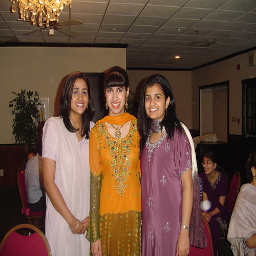

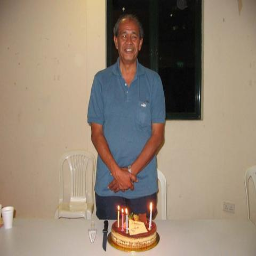

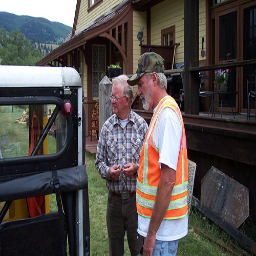

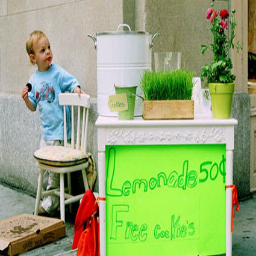

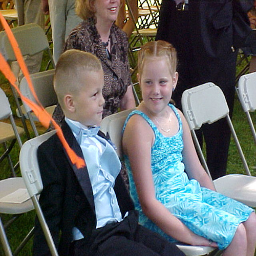

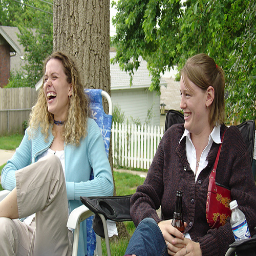

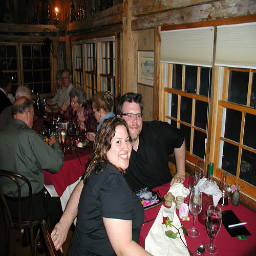

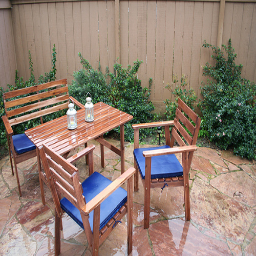

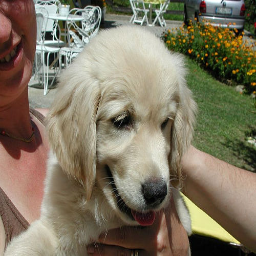

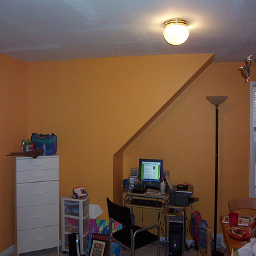

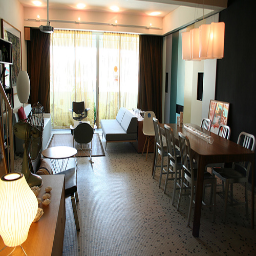

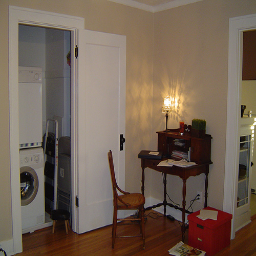

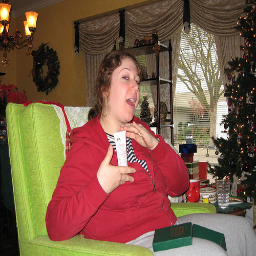

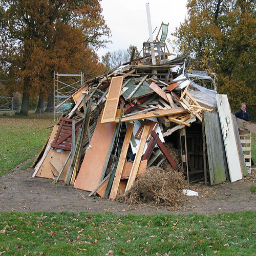

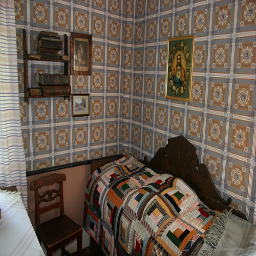

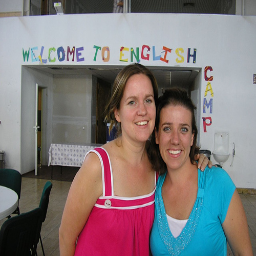

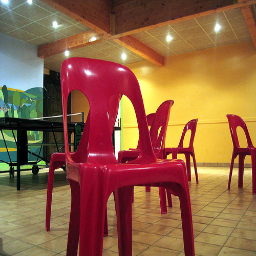

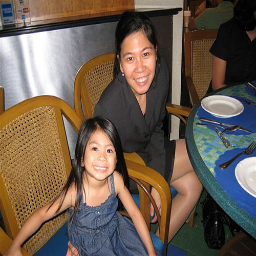

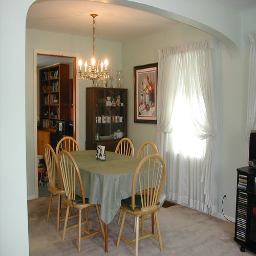

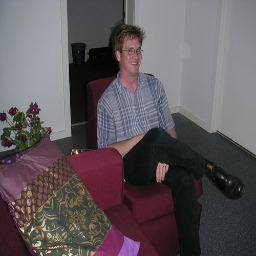

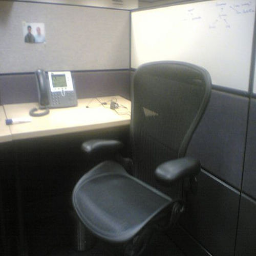

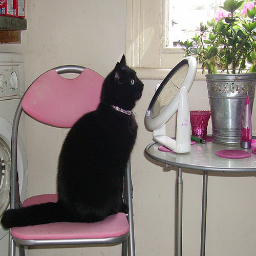

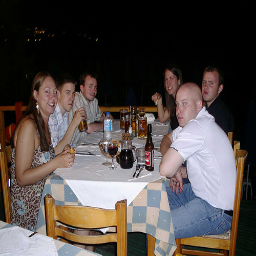

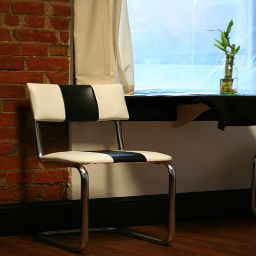

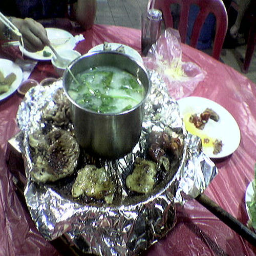

In [8]:
from google.colab.patches import cv2_imshow
for i in train['chair']:
  cv2_imshow(i)

In [9]:
def make_tabular_df(df):
  tags = df.columns
  df_transpose = df.transpose(copy=False)
  output = pd.DataFrame(columns=['captions',  'tags'])
  for index, col in df_transpose.iteritems():
    new = []
    for item in col:
      new.append(item)
    df=pd.DataFrame({"captions": new, "tags": tags})
    output=output.append(df)
  return output


In [10]:
X_train = make_tabular_df(train)
X_train.head()

captions       tags
0  [[[196, 184, 179], [196, 184, 179], [196, 184,...  aeroplane
1  [[[190, 178, 174], [190, 178, 174], [190, 178,...    bicycle
2  [[[54, 70, 95], [55, 71, 96], [55, 74, 93], [6...      chair
3  [[[15, 50, 96], [14, 52, 93], [12, 52, 97], [1...       bird
4  [[[42, 52, 28], [45, 48, 29], [38, 40, 19], [4...        cow

In [11]:
X_test = make_tabular_df(test)
X_test.head()

captions       tags
0  [[[227, 224, 221], [225, 222, 221], [224, 225,...  aeroplane
1  [[[1, 1, 5], [0, 0, 0], [1, 1, 1], [1, 2, 6], ...       bird
2  [[[28, 27, 23], [29, 24, 22], [23, 22, 20], [3...        cow
3  [[[220, 177, 99], [225, 178, 103], [223, 177, ...       boat
4  [[[41, 89, 62], [35, 55, 43], [46, 79, 72], [4...        car

We obtained the dataframes ready to go to next phase


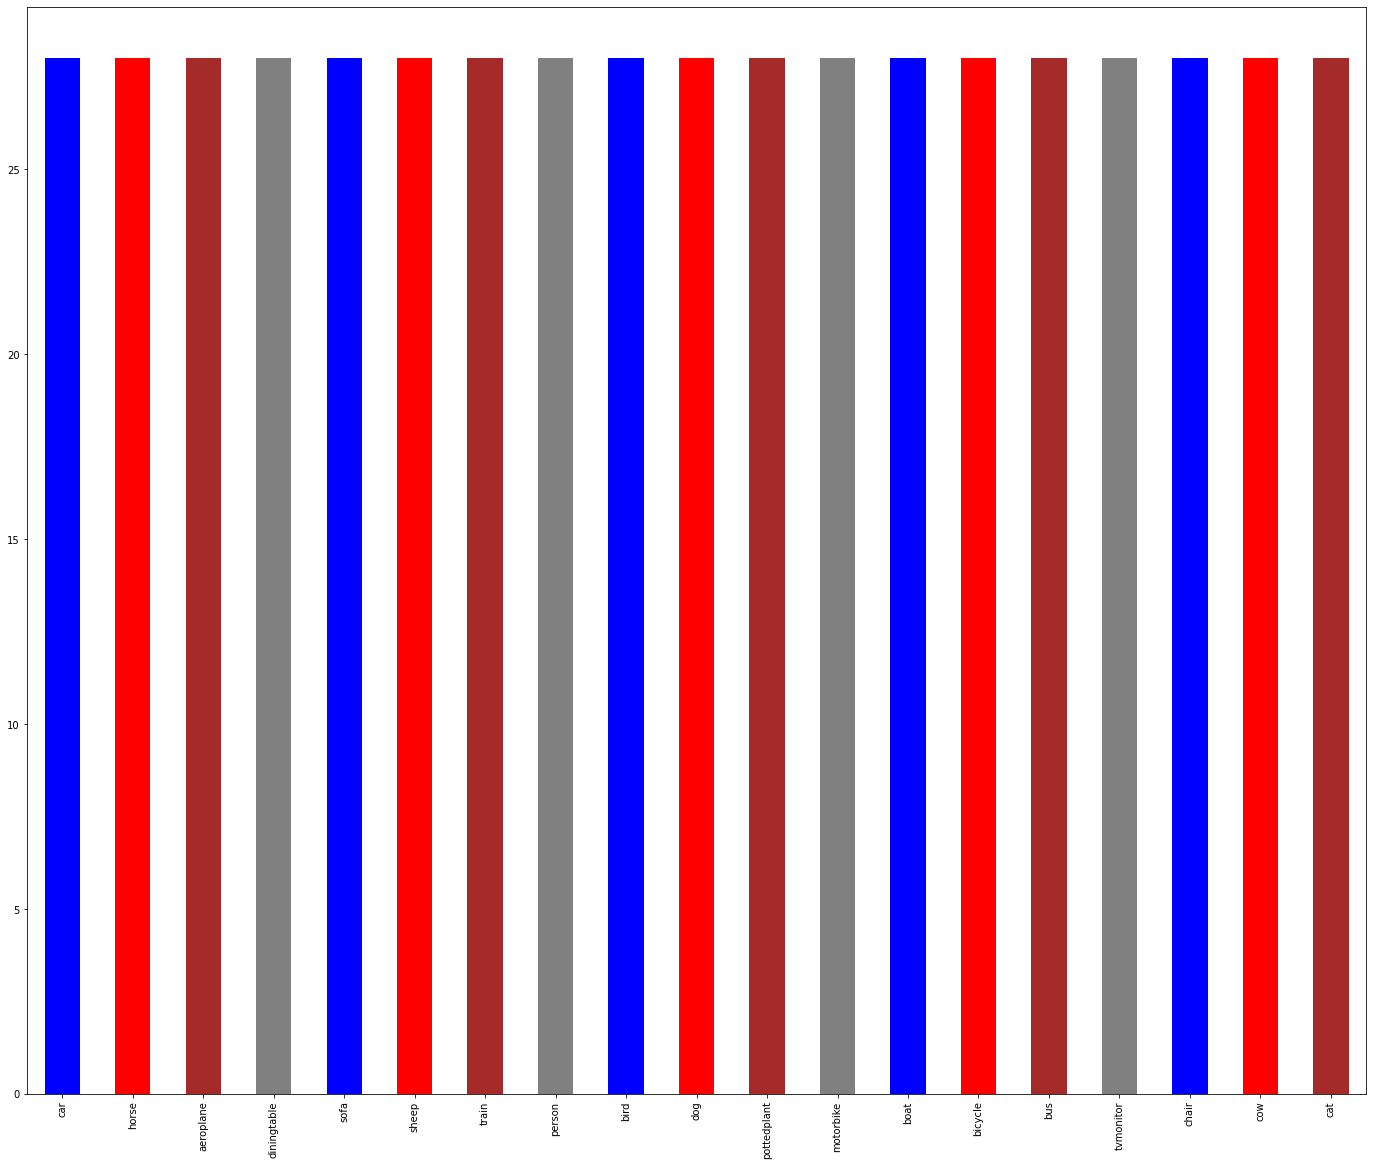

In [12]:
plt.figure(figsize=(24,20))
X_train.tags.value_counts().plot(kind='bar', color=['Blue', 'Red', 'Brown', 'Gray']);

We can confirm visually that our dataset is balanced

## Bag-Of-Words (BOW) with Keras

In [13]:
print(f"train size: {len(X_train)}")
print(f"test size: {len(X_test)}")

train size: 532
test size: 380


In [14]:
max_words = 1500
tokenizer = text.Tokenizer(num_words=max_words, char_level=False)

NameError: ignored

In [ ]:
tokenizer.fit_on_texts(X_train['captions']) 
x_train = tokenizer.texts_to_matrix(X_train['captions'])
x_test = tokenizer.texts_to_matrix(X_test['captions'])
x_train

In [ ]:
x_test

In [ ]:
print(f'shape of new x_train is: {x_train.shape}')
print(f'shape of new x_test is: {x_test.shape}')

in both encoder and tokenizer we only fit on train for consistency

In [ ]:
le = LabelEncoder()
le.fit(X_train['tags'])
y_train = le.transform(X_train['tags'])
y_test = le.transform(X_test['tags'])

In [ ]:
print(f'shape of new y_train is: {y_train.shape}')
print(f'shape of new y_test is: {y_test.shape}')

Convert the enoded y_train and y_test to one-hot representation

In [ ]:
num_tags = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_tags)
y_test = utils.to_categorical(y_test, num_tags)
y_train

In [ ]:
y_test

In [ ]:
print(f'shape of new x_train is: {x_train.shape}')
print(f'shape of new x_test is: {x_test.shape}')
print(f'shape of new y_train is: {y_train.shape}')
print(f'shape of new y_test is: {y_test.shape}')

Let's set our hyperparameters  
we will adjust these later to, if possible, reach higher accuracy

In [ ]:
batch_size = 16
epochs = 3

Buliding the model

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_tags))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

we have the model, train and test data prepared  
so let's train the model

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_split=0.1)

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print(f'Test score:{score[0]}')
print(f'Test accuracy:{score[1]}')

In [ ]:
txt_lbls = le.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = txt_lbls[np.argmax(prediction)]
    print(X_test['captions'].iloc[i][:50], "...")
    print('Actual label:' + X_test['tags'].iloc[i])
    print("Predicted label: " + predicted_label + "\n")

In [ ]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [ ]:
y_sm = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_sm)):
    probs = y_sm[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [ ]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=txt_lbls, title="Confusion matrix")
plt.show()